- Leaving the account is deemed as a sell
- Entering the account is deemed as a buy

Volume of transactions in one day compared to the magnitude of price difference from MATIC token price.

In [163]:
from Historic_Crypto import HistoricalData as HD
import pandas as pd
import requests
import json
from datetime import datetime
import matplotlib.pyplot as plt
import scipy


# Argument ---	   Description
- ticker ---	       supply the ticker information which you want to return (str).
- granularity ---	   please supply a granularity in seconds (60, 300, 900, 3600, 21600, 86400) (int).
- start_date ---	   a string in the format YYYY-MM-DD-HH-MM (str).
- end_date ---	   a string in the format YYYY-MM-DD-HH-MM (str). Optional, Default: Now
- verbose ---	       printing during extraction. Default: True

In [145]:
def etherScanAPICall():
    API_KEY = 'JATAZ8XWIBGBTY15YJJEABCDPIF8SCK7S3'
    MATIC_CONTRACT_ADDRESS = '0x7D1AfA7B718fb893dB30A3aBc0Cfc608AaCfeBB0'
    WALLET_ADDRESS = '0x9507c04b10486547584c37bcbd931b2a4fee9a41'
    url = 'https://api.etherscan.io/api?'

    parameters = {
        'module':'account',
        'action':'tokentx',
        'contractaddress':MATIC_CONTRACT_ADDRESS,
        'address':WALLET_ADDRESS,
        'page':'1',
        'offset':'10000',
        'startblock':'0',
        'endblock':'27025780',
        'sort':'asc',
        'apikey':API_KEY
    }

    responseJSON = requests.request("GET", url, params=parameters).json()

    with open("response.json", "w") as write_file:
        json.dump(responseJSON, write_file, indent=4, sort_keys = True)

    return responseJSON


In [146]:
transactionData = etherScanAPICall()

In [147]:
def cryptoHistoricalData(token, startDate, endDate):
    data = HD(token,86400,startDate,endDate).retrieve_data()
    data.to_csv('dataframe.csv')
    return data

In [148]:
# 2022-09-23
# 2022-12-02

# historicalData = cryptoHistoricalData('MATIC-USD','2022-11-01-00-00','2022-12-01-00-00')
historicalData = cryptoHistoricalData('MATIC-USD','2022-09-23-00-00','2022-12-02-00-00')
print(historicalData)

Checking input parameters are in the correct format.
Formatting Dates.
Checking if user supplied is available on the CoinBase Pro API.
Connected to the CoinBase Pro API.
Ticker 'MATIC-USD' found at the CoinBase Pro API, continuing to extraction.
Retrieved Data from Coinbase Pro API.
Returning data.
               low    high    open   close      volume
time                                                  
2022-09-23  0.7227  0.7851  0.7522  0.7783  36232202.9
2022-09-24  0.7498  0.7822  0.7785  0.7530  20125966.4
2022-09-25  0.7310  0.7671  0.7527  0.7397  17744065.2
2022-09-26  0.7262  0.7620  0.7396  0.7559  32675122.2
2022-09-27  0.7262  0.7937  0.7559  0.7389  40601976.9
...            ...     ...     ...     ...         ...
2022-11-28  0.8036  0.8486  0.8433  0.8209  37928981.3
2022-11-29  0.8129  0.8497  0.8213  0.8382  22869382.6
2022-11-30  0.8369  0.9446  0.8383  0.9330  69784755.8
2022-12-01  0.9057  0.9454  0.9331  0.9087  58028558.7
2022-12-02  0.9038  0.9224  0.9087  0.91

In [149]:
# if you encounter a "year is out of range" error the timestamp
# may be in milliseconds, try `ts /= 1000` in that case
def convert_UNIX_to_DateTime(unix):
    return datetime.utcfromtimestamp(int(unix)).strftime('%Y-%m-%d %H:%M:%S') # returns type str

In [150]:
convert_UNIX_to_DateTime(1661350027)
# print(type(convert_UNIX_to_DateTime(1661350027)))

'2022-08-24 14:07:07'

In [151]:
def getdailyTransactionVolume(transactionData):
    dailyTransactionVolume = {}

    for transaction in transactionData.get('result'):
        timeStamp = convert_UNIX_to_DateTime(transaction.get("timeStamp"))
        timeStamp = timeStamp[0:10]
        if (timeStamp in dailyTransactionVolume):
            # print(dailyTransactionVolume.get(timeStamp))
            cnt = dailyTransactionVolume.get(timeStamp) + 1
            dailyTransactionVolume[timeStamp] = cnt
        else:
            dailyTransactionVolume[timeStamp] = 1

    startDate = next(iter(dailyTransactionVolume)) 
    endDate = list(dailyTransactionVolume)[-1]

    print(startDate)
    print(endDate)

    print(len(dailyTransactionVolume))
    print(dailyTransactionVolume)

    return dailyTransactionVolume

In [152]:
dailyTransactionVolume = getdailyTransactionVolume(transactionData)

2022-08-24
2022-12-02
58
{'2022-08-24': 2, '2022-09-23': 69, '2022-09-24': 48, '2022-09-25': 40, '2022-09-26': 96, '2022-09-27': 34, '2022-09-28': 3, '2022-09-29': 19, '2022-09-30': 103, '2022-10-01': 9, '2022-10-02': 26, '2022-10-03': 60, '2022-10-04': 69, '2022-10-05': 4, '2022-10-07': 3, '2022-10-08': 27, '2022-10-10': 1, '2022-10-12': 2, '2022-10-18': 1, '2022-10-21': 19, '2022-10-22': 24, '2022-10-23': 29, '2022-10-24': 28, '2022-10-25': 63, '2022-10-26': 49, '2022-10-27': 51, '2022-10-28': 46, '2022-10-29': 56, '2022-10-30': 71, '2022-10-31': 44, '2022-11-01': 29, '2022-11-02': 87, '2022-11-03': 116, '2022-11-04': 162, '2022-11-05': 110, '2022-11-06': 73, '2022-11-07': 88, '2022-11-08': 97, '2022-11-11': 37, '2022-11-12': 5, '2022-11-14': 48, '2022-11-15': 13, '2022-11-16': 20, '2022-11-17': 30, '2022-11-18': 2, '2022-11-19': 8, '2022-11-20': 23, '2022-11-21': 1, '2022-11-23': 21, '2022-11-24': 61, '2022-11-25': 34, '2022-11-26': 14, '2022-11-27': 15, '2022-11-28': 7, '2022-11-29

In [153]:
def createPlotFromDict(dict):
    keys = dict.keys()
    values = dict.values()
    # plt.bar(keys, values)
    plt.plot(keys, values)
    # plots bar chart of keys (x) against values (y)

In [154]:
def getRangePrices():
    highPrices = list(historicalData["high"])
    lowPrices = list(historicalData["low"])
    rangePrices = [a - b for a, b in zip(highPrices, lowPrices)]
     
    dateTimes = historicalData.index.tolist()

    datesToRangePrice = {}
    cnt = 0

    for dateTime in dateTimes:
        datesToRangePrice[str(dateTime)[0:10]] = rangePrices[cnt]
        cnt += 1

    # print(datesToRangePrice)
    return datesToRangePrice

In [155]:
pricesDict = getRangePrices()

In [156]:
def alignPriceToTransactions(transactions, prices):

    newRangePrices = {}

    for key in transactions.keys():
        if (key in prices):
            newRangePrices[key] = prices.get(key)

    print(len(prices))
    print(len(transactions))
    print(len(newRangePrices))
    print(newRangePrices)

    return newRangePrices

In [157]:
priceRanges = alignPriceToTransactions(dailyTransactionVolume, pricesDict)

71
58
57
{'2022-09-23': 0.06240000000000001, '2022-09-24': 0.032399999999999984, '2022-09-25': 0.03610000000000002, '2022-09-26': 0.035800000000000054, '2022-09-27': 0.0675, '2022-09-28': 0.042300000000000004, '2022-09-29': 0.033399999999999985, '2022-09-30': 0.028899999999999926, '2022-10-01': 0.02179999999999993, '2022-10-02': 0.022399999999999975, '2022-10-03': 0.053200000000000025, '2022-10-04': 0.04359999999999997, '2022-10-05': 0.0403, '2022-10-07': 0.030000000000000027, '2022-10-08': 0.026699999999999946, '2022-10-10': 0.031399999999999983, '2022-10-12': 0.01969999999999994, '2022-10-18': 0.044499999999999984, '2022-10-21': 0.05879999999999996, '2022-10-22': 0.026899999999999924, '2022-10-23': 0.0837, '2022-10-24': 0.036800000000000055, '2022-10-25': 0.07389999999999997, '2022-10-26': 0.05010000000000003, '2022-10-27': 0.05389999999999995, '2022-10-28': 0.05290000000000006, '2022-10-29': 0.03290000000000004, '2022-10-30': 0.05109999999999992, '2022-10-31': 0.03700000000000003, '

In [168]:
def alignTransactionsToPrice(transactions, prices):

    newTransactions = {}

    for key in prices.keys():
        if (key in transactions):
            newTransactions[key] = transactions.get(key)
        else:
            newTransactions[key] = 0

    print(len(prices))
    print(len(transactions))
    print(len(newTransactions))
    print(newTransactions)

    return newTransactions

In [169]:
transactionsDict = alignTransactionsToPrice(dailyTransactionVolume, pricesDict)

71
57
71
{'2022-09-23': 69, '2022-09-24': 48, '2022-09-25': 40, '2022-09-26': 96, '2022-09-27': 34, '2022-09-28': 3, '2022-09-29': 19, '2022-09-30': 103, '2022-10-01': 9, '2022-10-02': 26, '2022-10-03': 60, '2022-10-04': 69, '2022-10-05': 4, '2022-10-06': 0, '2022-10-07': 3, '2022-10-08': 27, '2022-10-09': 0, '2022-10-10': 1, '2022-10-11': 0, '2022-10-12': 2, '2022-10-13': 0, '2022-10-14': 0, '2022-10-15': 0, '2022-10-16': 0, '2022-10-17': 0, '2022-10-18': 1, '2022-10-19': 0, '2022-10-20': 0, '2022-10-21': 19, '2022-10-22': 24, '2022-10-23': 29, '2022-10-24': 28, '2022-10-25': 63, '2022-10-26': 49, '2022-10-27': 51, '2022-10-28': 46, '2022-10-29': 56, '2022-10-30': 71, '2022-10-31': 44, '2022-11-01': 29, '2022-11-02': 87, '2022-11-03': 116, '2022-11-04': 162, '2022-11-05': 110, '2022-11-06': 73, '2022-11-07': 88, '2022-11-08': 97, '2022-11-09': 0, '2022-11-10': 0, '2022-11-11': 37, '2022-11-12': 5, '2022-11-13': 0, '2022-11-14': 48, '2022-11-15': 13, '2022-11-16': 20, '2022-11-17': 30,

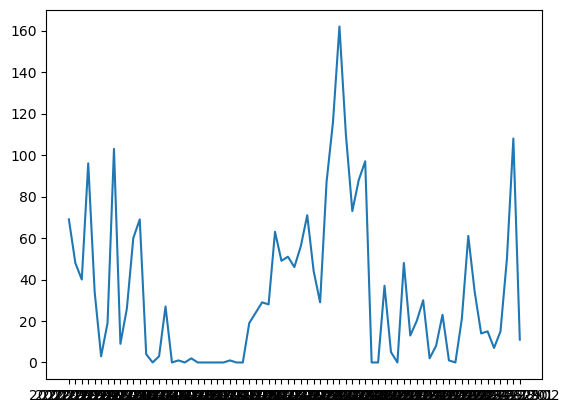

In [170]:
createPlotFromDict(transactionsDict)

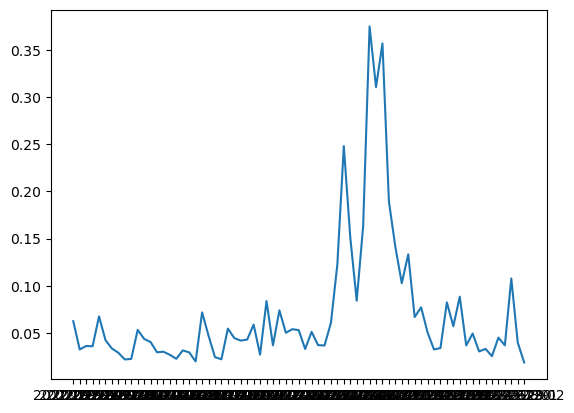

In [171]:
createPlotFromDict(pricesDict)

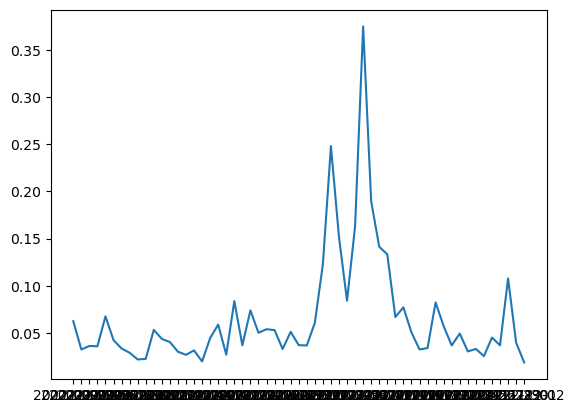

In [158]:
createPlotFromDict(priceRanges)

57


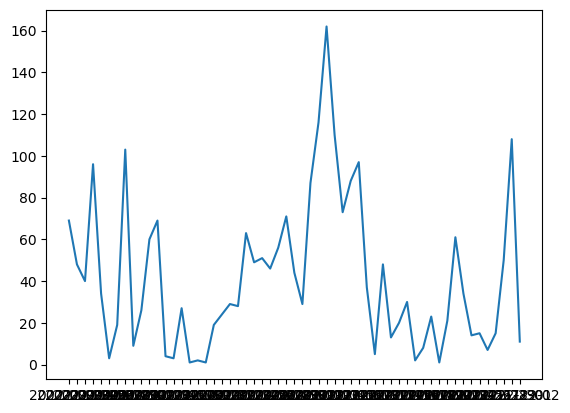

In [160]:
del dailyTransactionVolume['2022-08-24']
print(len(dailyTransactionVolume))
createPlotFromDict(dailyTransactionVolume)

In [161]:
a = list(priceRanges.values())
b = list(dailyTransactionVolume.values())

In [172]:
a = list(pricesDict.values())
b = list(transactionsDict.values())

In [173]:
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(a, b)
    
print(r_value**2)
print(p_value)

0.08198917925312318
0.015485548357291183
